In [3]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
def roll_die():
    return random.randint(1, 6)

In [6]:
class Player:
    def __init__(self, points):
        self.points = points
        
    def roll_die(self):
        return random.randint(1, 6)
    
    
    def should_roll_again(self, number):
        return False
    
    
class CautiousPlayer(Player):
    def __init__(self, points):
        super().__init__(points)
        
        
    def should_roll_again(self, number):
        if number >= 2:
            return False
        else:
            return True
     
    

class MedPlayer(Player):
    def __init__(self, points):
        super().__init__(points)
        
        
    def should_roll_again(self, number):
        if number >= 4:
            return False
        else:
            return True    
    
    

class RiskyPlayer(Player):
    def __init__(self, points):
        super().__init__(points)
        
        
    def should_roll_again(self, number):
        if number >= 6:
            return False
        else:
            return True
        
        
class CrazyPlayer(Player):
    def __init__(self, points):
        super().__init__(points)
        
        
    def should_roll_again(self, number):
        if number >= 7:
            return False
        else:
            return True

In [9]:
class PigSolitaireGame:
    def __init__(self, player):
        self.player = player

    
    def reset(self):
        self.points = 0
        self.rolls = 0   
        
    def play_game(self):
        self.reset()  
        for _ in range(7):
            while True: 
                self.rolls += 1
                number = roll_die()
                if number == 1:
                    self.points = 0
                else:
                    self.points += number
                if self.player.should_roll_again(number) == False:
                    self.points += number
                    break
        return self.points 

In [57]:
print(PigSolitaireGame(CautiousPlayer(0)).play_game())
print(PigSolitaireGame(MedPlayer(0)).play_game())
print(PigSolitaireGame(RiskyPlayer(0)).play_game())

56
20
22


In [18]:
# print(PigSolitaireGame(CrazyPlayer(0)).play_game())

In [19]:
def cautious_test_runs(x):
    return [PigSolitaireGame(CautiousPlayer(0)).play_game() for x in range(x)]

In [20]:
def med_test_runs(x):
    return [PigSolitaireGame(MedPlayer(0)).play_game() for x in range(x)]

In [21]:
def risky_test_runs(x):
    return [PigSolitaireGame(RiskyPlayer(0)).play_game() for x in range(x)]

In [22]:
def crazy_test_runs(x):
    return [PigSolitaireGame(RiskyPlayer(0)).play_game() for x in range(x)]

In [24]:
cautious1 = cautious_test_runs(1000)
medium1 = med_test_runs(1000)
risky1 = risky_test_runs(1000)
# crazy1 = crazy_test_runs(1000)


cautious2 = cautious_test_runs(100000)
medium2 = med_test_runs(100000)
risky2 = risky_test_runs(100000)
# crazy2 = crazy_test_runs(1000)

In [63]:
cautious2_mean = st.mean(cautious2)
medium2_mean = st.mean(medium2)
risky2_mean = st.mean(risky2)
print(cautious2_mean)
print(medium2_mean)
print(risky2_mean)

34.6783
39.09187
37.5964


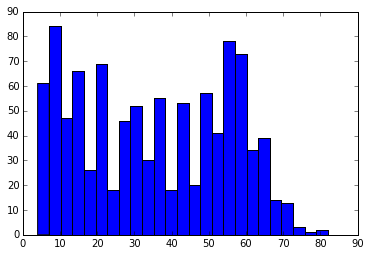

In [32]:
plt.hist(cautious1, bins=25)
plt.show()

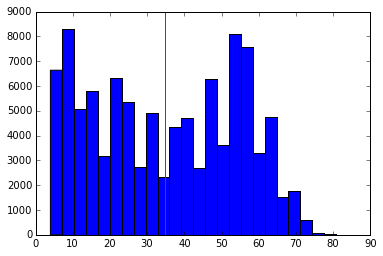

In [70]:
plt.hist(cautious2, bins=25)
plt.vlines(cautious2_mean, ymin=0, ymax=9000, color='red')
plt.show()

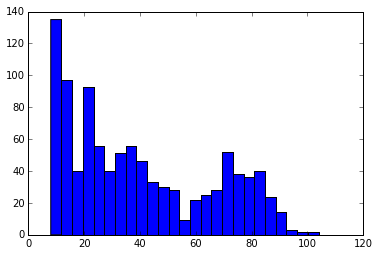

In [34]:
plt.hist(medium1, bins=25)
plt.show()

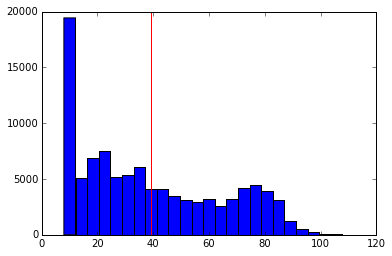

In [71]:
plt.hist(medium2, bins=25)
plt.vlines(medium2_mean, ymin=0, ymax=20000, color='red')
plt.show()

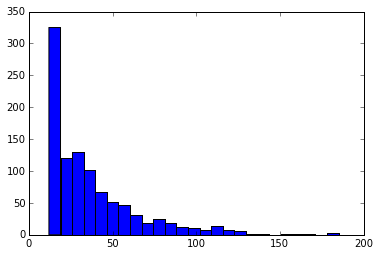

In [36]:
plt.hist(risky1, bins=25)
plt.show()

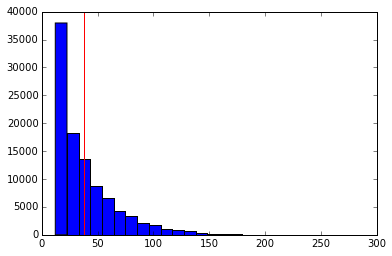

In [72]:
plt.hist(risky2, bins=25)
plt.vlines(risky2_mean, ymin=0, ymax=40000, color='red')
plt.show()

In [ ]:
plt.hist(crazy1)
plt.show()

In [ ]:
plt.hist(crazy2)
plt.show()

The above graphs point towards a moderate playing style that is neither overly aggressive nor overly careful being most likly to lead to an increased score and a greater chance of winning the game. While not a large difference, the data shows that the player taking a moderate level of risk during the simulations outscored the other simulated levels of risk taken.